In [1]:
import os
os.chdir('../..')
import numpy as np
import pickle
from tqdm import tqdm

In [2]:
from molexplain.utils import DATA_PATH

In [3]:
with open(os.path.join(DATA_PATH, 'herg', 'data_herg.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)


with open(os.path.join(DATA_PATH, 'herg', 'sim_herg.pt'), 'rb') as handle:
    sim = pickle.load(handle)
    
diff_true = np.load(os.path.join(DATA_PATH, 'herg', 'diff_exp.npy'))
diff_hat = np.load(os.path.join(DATA_PATH, 'herg', 'diff_hat.npy'))

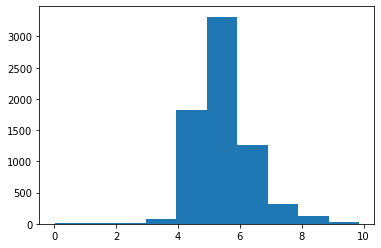

In [4]:
import matplotlib.pyplot as plt
plt.hist(values)
plt.show()

In [5]:
ligand_i = []
ligand_j = []

long_sim = []
long_true = []
long_hat = []

for idx_i, inchi_i in enumerate(inchis):
    for idx_j, inchi_j in enumerate(inchis):
        if idx_i < idx_j:
            ligand_i.append(inchi_i)
            ligand_j.append(inchi_j)
            long_sim.append(sim[idx_i, idx_j])
            long_true.append(diff_true[idx_i, idx_j])
            long_hat.append(diff_hat[idx_i, idx_j])

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)

df_pairs = pd.DataFrame({'inchi_i': ligand_i,
                         'inchi_j': ligand_j,
                         'similarity': long_sim,
                         'diff_exp': long_true,
                         'diff_pred': long_hat})

In [7]:
def sali_index(sim, diff):
    return np.abs(diff) / (1 - sim)

In [8]:
df_pairs = df_pairs.loc[df_pairs['similarity'] < 1.0]
df_pairs['sali_exp'] = sali_index(df_pairs['similarity'], df_pairs['diff_exp'])
df_pairs['sali_pred'] = sali_index(df_pairs['similarity'], df_pairs['diff_pred'])
df_pairs.sort_values('sali_pred', ascending=False, inplace=True)
df_pairs.reset_index(inplace=True)

In [9]:
df_pairs.head(n=400)

index                                            inchi_i  \
0    22545764  InChI=1S/C25H31ClN2O4/c26-24-15-23(5-4-20(24)1...   
1    22547485  InChI=1S/C25H31ClN2O4/c26-23-15-21(6-5-19(23)1...   
2    11251909  InChI=1S/C27H28N6O4/c1-35-25-18(13-28)12-20-23...   
3    11277986  InChI=1S/C30H33ClN2O3/c1-35-27-8-4-5-9-28(27)3...   
4    12480747  InChI=1S/C26H32Cl2N2O3/c27-23-7-6-22(17-24(23)...   
5    18684408  InChI=1S/C29H34N4O3/c1-35-25-8-4-5-9-26(25)36-...   
6    18891491  InChI=1S/C32H33FN6O6/c33-22-15-35-23-2-4-28(43...   
7    17403504  InChI=1S/C29H33N3O4/c1-35-26-8-4-5-9-27(26)36-...   
8    11281381  InChI=1S/C30H33ClN2O3/c1-35-27-8-4-5-9-28(27)3...   
9    17736911  InChI=1S/C29H33N3O4/c1-35-25-10-4-5-11-26(25)3...   
10   22821221  InChI=1S/C29H33N3O3/c1-34-26-8-4-5-9-27(26)35-...   
11   16672078  InChI=1S/C29H31FN6O4/c30-21-16-32-22-4-6-25(38...   
12   11592585  InChI=1S/C27H28N6O4/c1-35-23-5-3-20-24(33-23)1...   
13   11592632  InChI=1S/C27H28N6O4/c1-35-23-5-3-20-24(33-23)1...   
14   20450905  InChI=1S/C23H26FN5O3/c24-20-6-2-1-5-19(20)21(3...   
15   17733516  InChI=1S/C29H33N3O4/c1-35-25-10-4-5-11-26(25)3...   
16   17406899  InChI=1S/C29H33N3O4/c1-35-26-8-4-5-9-27(26)36-...   
17   11267314  InChI=1S/C27H28N6O4/c1-35-22-12-19-24(32-20(22...   
18   17244241  InChI=1S/C26H25FN6O3/c27-19-13-29-20-3-1-16(11...   
19   21673338  InChI=1S/C25H39N3O3S/c1-3-5-9-21-19-22-10-8-13...   
20   17218026  InChI=1S/C27H28N6O3/c1-17-19(13-28)12-21-24(31...   
21   11592690  InChI=1S/C27H28N6O4/c1-35-23-5-3-20-24(33-23)1...   
22   19700462  InChI=1S/C25H38N2O3S/c1-5-6-9-20-18-21-10-7-13...   
23   22837412  InChI=1S/C29H33N3O3/c1-34-26-11-4-5-12-27(26)3...   
24   17221401  InChI=1S/C27H28N6O3/c1-17-19(13-28)12-21-24(31...   
25   11592611  InChI=1S/C27H28N6O4/c1-35-23-5-3-20-24(33-23)1...   
26   17725916  InChI=1S/C29H33N3O4/c1-35-26-11-4-5-12-27(26)3...   
27   18684417  InChI=1S/C29H34N4O3/c1-35-25-8-4-5-9-26(25)36-...   
28   18672629  InChI=1S/C29H34N4O3/c1-35-26-8-4-5-9-27(26)36-...   
29   17244538  InChI=1S/C26H25FN6O3/c27-19-13-29-20-3-1-16(11...   
30   11241634  InChI=1S/C27H31FN6O3/c1-34(2)25-19(28)13-20-23...   
31    8162330  InChI=1S/C23H21FN2O5/c24-15-2-3-17-18(27)11-22...   
32   18544247  InChI=1S/C25H30Cl2N2O3/c26-23-5-4-22(16-24(23)...   
33   18280262  InChI=1S/C25H30Cl2N2O3/c26-22-6-5-21(16-23(22)...   
34   11272447  InChI=1S/C26H28FN5O4/c1-34-24-18(27)12-19-22(3...   
35   11278245  InChI=1S/C30H33ClN2O3/c1-35-27-8-4-5-9-28(27)3...   
36   17244372  InChI=1S/C26H25FN6O3/c27-19-13-29-20-3-1-16(11...   
37   17722521  InChI=1S/C29H33N3O4/c1-35-26-11-4-5-12-27(26)3...   
38   18283773  InChI=1S/C25H30Cl2N2O3/c26-23-6-5-21(15-24(23)...   
39   17237025  InChI=1S/C25H27FN6O3/c26-17-12-28-18-2-4-20(27...   
40   18684415  InChI=1S/C29H34N4O3/c1-35-25-8-4-5-9-26(25)36-...   
41   18683090  InChI=1S/C29H34N4O3/c1-35-25-8-4-5-9-26(25)36-...   
42   24356162  InChI=1S/C27H28N6O5/c1-36-23-5-3-19-24(33-23)1...   
43   18412976  InChI=1S/C25H30Cl2N2O3/c26-23-5-4-22(15-24(23)...   
44   24357898  InChI=1S/C27H28FN5O5/c1-36-25(35)20-4-3-19-23(...   
45   11597337  InChI=1S/C27H28N6O4/c1-35-23-5-3-20-24(33-23)1...   
46   11669746  InChI=1S/C26H28FN5O4/c1-34-22-5-3-19-23(32-22)...   
47   22545766  InChI=1S/C25H31ClN2O4/c26-24-15-23(5-4-20(24)1...   
48   17213998  InChI=1S/C28H37ClN2O6S/c1-38(35,36)25-6-2-20(3...   
49   11556719  InChI=1S/C24H25F3N6O3/c1-2-28-23(34)32-8-6-31(...   
50   16593028  InChI=1S/C28H33FN6O4/c29-20-15-31-21-3-5-24(37...   
51   12485228  InChI=1S/C27H34Cl2N2O3/c1-19-2-4-20(5-3-19)16-...   
52   11246772  InChI=1S/C27H31N5O5/c1-34-21-13-19-23(32-25(21...   
53   11311776  InChI=1S/C27H31FN6O3/c1-34(2)22-6-4-20-24(32-2...   
54   16040781  InChI=1S/C28H32FN5O5/c29-20-15-30-21-3-5-24(37...   
55   19598231  InChI=1S/C24H37N3O3S/c1-3-5-9-20-18-21-10-8-13...   
56   17252604  InChI=1S/C29H31ClN2O2/c30-25-12-10-23(11-13-25...   
57   12778712  InChI=1S/C25H30Cl2N2O4/c26-23-5-4-22(15-24(23)...

In [22]:
inchi_i, inchi_j = df_pairs.loc[4, 'inchi_i'], df_pairs.loc[4, 'inchi_j']

In [11]:
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)

RDKit WARNING: [15:10:53] Enabling RDKit 2019.09.3 jupyter extensions


In [12]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

Using backend: pytorch


In [13]:
import torch
model_pt = os.path.join(MODELS_PATH, 'herg_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

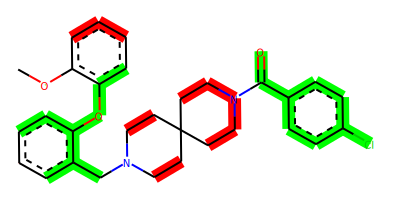

In [29]:
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

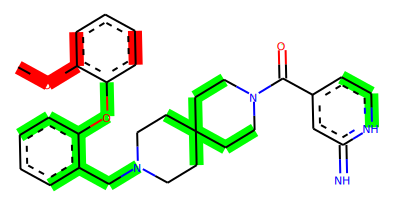

In [30]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

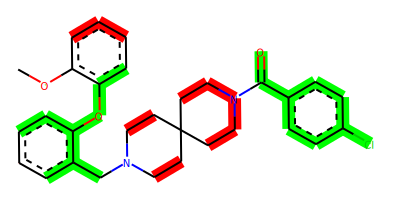

In [37]:
inchi_i, inchi_j = df_pairs.loc[35, 'inchi_i'], df_pairs.loc[35, 'inchi_j'] # meh
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

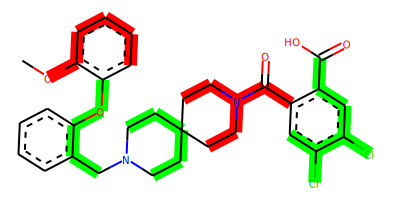

In [38]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

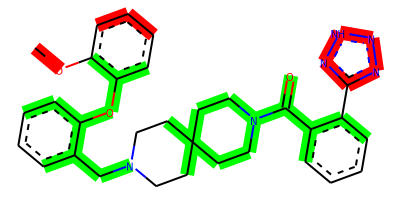

In [49]:
inchi_i, inchi_j = df_pairs.loc[106, 'inchi_i'], df_pairs.loc[106, 'inchi_j']  # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

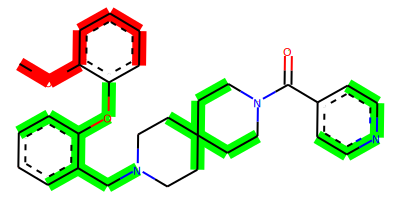

In [50]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

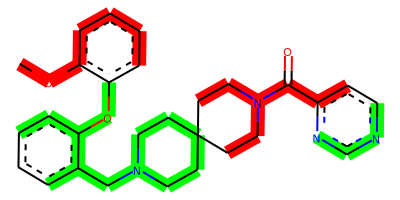

In [51]:
inchi_i, inchi_j = df_pairs.loc[107, 'inchi_i'], df_pairs.loc[107, 'inchi_j']  # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

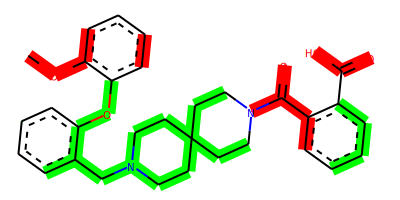

In [52]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

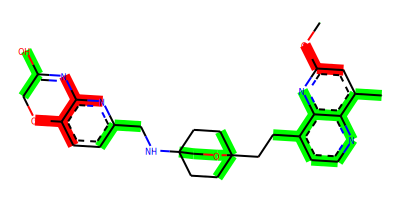

In [59]:
inchi_i, inchi_j = df_pairs.loc[240, 'inchi_i'], df_pairs.loc[240, 'inchi_j']  # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

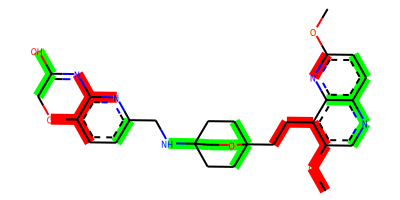

In [62]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

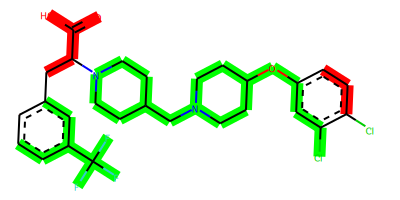

In [69]:
inchi_i, inchi_j = df_pairs.loc[269, 'inchi_i'], df_pairs.loc[269, 'inchi_j']  # could show
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

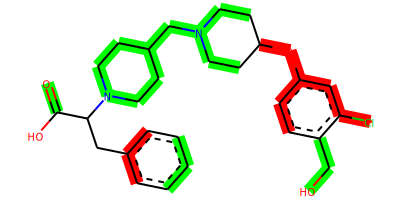

In [70]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

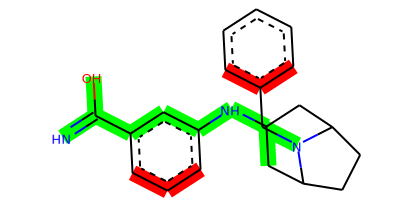

In [87]:
inchi_i, inchi_j = df_pairs.loc[361, 'inchi_i'], df_pairs.loc[361, 'inchi_j']  # bad case
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

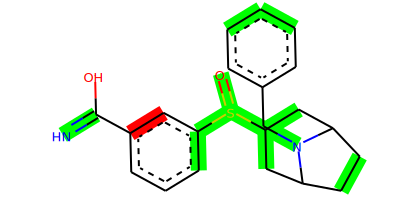

In [88]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

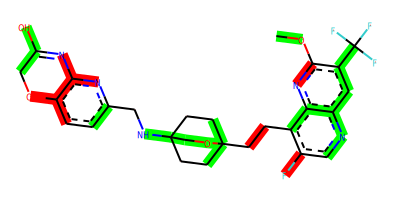

In [95]:
inchi_i, inchi_j = df_pairs.loc[398, 'inchi_i'], df_pairs.loc[398, 'inchi_j']  # meh
mol_i, mol_j = MolFromInchi(inchi_i), MolFromInchi(inchi_j)
svg, img, _, _, global_importance = molecule_importance(mol_i,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img

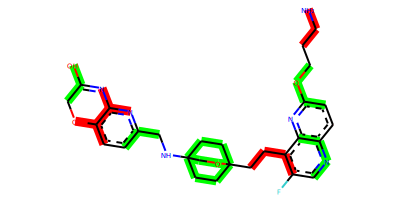

In [96]:
svg, img, _, _, global_importance = molecule_importance(mol_j,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-4,
                                                      addHs=False)
img